<a href="https://colab.research.google.com/github/kezinas/ml2025/blob/main/ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

#Сбор и интеграция данных

In [ ]:
url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.1%20data%20integration/data/issues1.csv'
data1 = pd.read_csv(url, index_col=0)
data1.head(3)

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5


In [ ]:
url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.1%20data%20integration/data/issues2.csv'
data2 = pd.read_csv(url, index_col=0)
data2.head(3)

,Id,channel_name,category,Sub-category,Order_id,Reported at,Responded at,Survey responded at,Agent_name,CSAT Score
0,6ba211fe-7643-4998-a7f7-cf34e5a4322c,Inbound,Order Related,Delayed,2dab4a7a-baf0-49f9-9d84-c8acdb4a11db,"21 08 2023, 09:01:00 PM","21 08 2023, 09:04:00 PM",21 08 2023,A. Rodriguez,5
1,acef2550-cdd7-4e6a-b5b8-6d9627da9549,Inbound,Cancellation,Not Needed,5993a1f0-570d-4c82-95d9-6cc56c78043e,"18 08 2023, 09:20:00 PM","18 08 2023, 09:20:00 PM",18 08 2023,R. Lee,5
2,46d012ec-cb21-40ce-afe1-5fe78905250a,Inbound,Returns,Return request,b64f579f-d913-4e85-978f-d0f6de902c3f,"24 08 2023, 09:57:00 PM","24 08 2023, 09:58:00 PM",24 08 2023,S. Douglas,5


In [ ]:
url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.1%20data%20integration/data/issues4.csv'
data3 = pd.read_csv(url, index_col=0)
data3.head(3)

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent,CSAT Score
0,3350ccee-ead7-40fa-80c6-cc7b5e6e345a,Inbound,Returns,Reverse Pickup Enquiry,"August 27, 2023, 08:28:00 AM","August 27, 2023, 08:29:00 AM","August 27, 2023, 12:00:00 AM",Terry Young,5
1,4a88df6e-aafb-477a-bd8e-63ffc34c1a43,Inbound,Returns,Wrong,"December 08, 2023, 03:04:00 PM","August 12, 2023, 03:19:00 PM","August 12, 2023, 12:00:00 AM",Brenda Cox,4
2,7b5dbea2-2370-490a-8fef-4c5f7c52a4cc,Inbound,Returns,Reverse Pickup Enquiry,"August 13, 2023, 12:45:00 PM","August 13, 2023, 01:02:00 PM","August 13, 2023, 12:00:00 AM",Brian Mcguire,5


In [ ]:
data1.shape, data2.shape, data3.shape

((28425, 11), (44339, 10), (13143, 9))

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28425 entries, 0 to 28424
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    28425 non-null  object
 1   Channel               28425 non-null  object
 2   category              28425 non-null  object
 3   Sub-category          28425 non-null  object
 4   Customer Remarks      28425 non-null  object
 5   Order_id              22389 non-null  object
 6   Issue_reported_Date   28425 non-null  object
 7   Issue_responded_Date  28425 non-null  object
 8   Survey_response_Date  28425 non-null  object
 9   Agent_name            28425 non-null  object
 10  CSAT Score            28425 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 3.6+ MB


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44339 entries, 0 to 44338
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   44339 non-null  object
 1   channel_name         44339 non-null  object
 2   category             44339 non-null  object
 3   Sub-category         44339 non-null  object
 4   Order_id             44272 non-null  object
 5   Reported at          44339 non-null  object
 6   Responded at         44339 non-null  object
 7   Survey responded at  44339 non-null  object
 8   Agent_name           44339 non-null  object
 9   CSAT Score           44339 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 4.7+ MB


In [ ]:
data2 = data2.rename(columns={
    'channel_name': 'Channel',
    'Reported at': 'Issue_reported_Date',
    'Responded at': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
})
data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'])
data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'])
data2['Survey_response_Date'] = pd.to_datetime(data2['Survey_response_Date'], format='%d %m %Y')
data1['Issue_reported_Date'] = pd.to_datetime(data1['Issue_reported_Date'], format='%d/%m/%Y %H:%M')
data1['Issue_responded_Date'] = pd.to_datetime(data1['Issue_responded_Date'], format='%d/%m/%Y %H:%M')
data1['Survey_response_Date'] = pd.to_datetime(data1['Survey_response_Date'], format='%d-%b-%y')

<ipython-input-9-6596b61b631e>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'])
<ipython-input-9-6596b61b631e>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'])


In [ ]:
data_12 = pd.concat([data1, data2])
data_12.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5


Проверка на дубликаты

In [ ]:
columns = [c for c in data_12.columns if c != 'Id']
print(len(data_12))
data_12 = data_12.drop_duplicates(subset=columns).reset_index(drop=True)
print(len(data_12))

72764
72764


In [ ]:
data_12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72764 entries, 0 to 44338
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    72764 non-null  object        
 1   Channel               72764 non-null  object        
 2   category              72764 non-null  object        
 3   Sub-category          72764 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   72764 non-null  datetime64[ns]
 7   Issue_responded_Date  72764 non-null  datetime64[ns]
 8   Survey_response_Date  72764 non-null  datetime64[ns]
 9   Agent_name            72764 non-null  object        
 10  CSAT Score            72764 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 6.7+ MB


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13143 entries, 0 to 13142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique id             13143 non-null  object
 1   channel_name          13143 non-null  object
 2   category              13143 non-null  object
 3   Sub-category          13143 non-null  object
 4   Issue_reported at     13143 non-null  object
 5   issue_responded       13143 non-null  object
 6   Survey_response_Date  13143 non-null  object
 7   Agent                 13143 non-null  object
 8   CSAT Score            13143 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.5+ MB


In [ ]:
data3 = data3.rename(columns={
    'Unique id': 'Id',
    'channel_name': 'Channel',
    'Issue_reported at': 'Issue_reported_Date',
    'issue_responded': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
    'Agent': 'Agent_name'
})
data3['Issue_reported_Date'] = pd.to_datetime(data3['Issue_reported_Date'])
data3['Issue_responded_Date'] = pd.to_datetime(data3['Issue_responded_Date'])
data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])
data3['Agent_name'] = data3['Agent_name'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.NAN
)

<ipython-input-13-98b6c24c47d0>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])


In [ ]:
data_123 = pd.concat([data_12, data3])
data_123.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5


Проверка на дубликаты

In [ ]:
columns = [c for c in data_123.columns if c != 'Id']
print(len(data_123))
data_123 = data_123.drop_duplicates(subset=columns).reset_index(drop=True)
print(len(data_123))

85907
85906


In [ ]:
data_123.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85907 entries, 0 to 13142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    85907 non-null  object        
 1   Channel               85907 non-null  object        
 2   category              85907 non-null  object        
 3   Sub-category          85907 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   85907 non-null  datetime64[ns]
 7   Issue_responded_Date  85907 non-null  datetime64[ns]
 8   Survey_response_Date  85907 non-null  datetime64[ns]
 9   Agent_name            85907 non-null  object        
 10  CSAT Score            85907 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 7.9+ MB


In [ ]:
url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.1%20data%20integration/data/orders.csv'
orders_data = pd.read_csv(url, index_col=0)
orders_data.head(3)

,Id,order_date_time,Customer_City,Product_category,Item_price
0,53465d50-a568-48a9-b96e-ee2a0524fee8,14/08/2023 18:54,NEW DELHI,Books & General merchandise,144.0
1,57d64c28-e3dc-49bd-8e8a-8e24572c6b59,30/07/2023 21:43,HAJIPUR,Home,445.0
2,55d4e1bb-e148-437f-aa83-3bfbae939155,10/07/2023 21:20,HYDERABAD,LifeStyle,399.0


In [ ]:
orders_data = orders_data.rename(columns={
    'Id': 'Order_id',
})
data_with_orders = data_123.merge(orders_data, on='Order_id', how='left')
data_with_orders.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN


<Axes: >

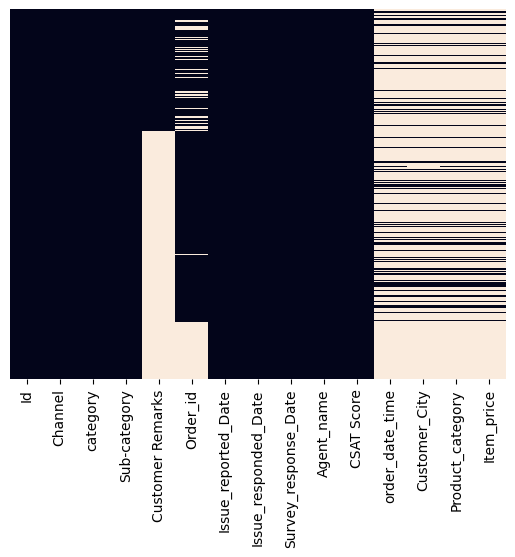

In [ ]:
sns.heatmap(data_with_orders.isnull(), yticklabels=False, cbar=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    85907 non-null  object        
 1   Channel               85907 non-null  object        
 2   category              85907 non-null  object        
 3   Sub-category          85907 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   85907 non-null  datetime64[ns]
 7   Issue_responded_Date  85907 non-null  datetime64[ns]
 8   Survey_response_Date  85907 non-null  datetime64[ns]
 9   Agent_name            85907 non-null  object        
 10  CSAT Score            85907 non-null  int64         
 11  order_date_time       16951 non-null  object        
 12  Customer_City         16817 non-null  object        
 13  Product_category

<Axes: >

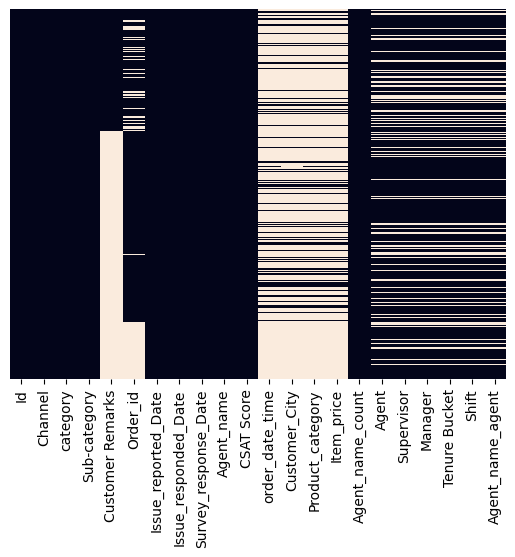

In [ ]:
url_agents = 'https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.1%20data%20integration/data/agents.csv'
agent_data = pd.read_csv(url_agents, index_col=0)

agent_data['Agent_name'] = agent_data['Agent'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.nan
)
agent_name_counts = agent_data['Agent_name'].value_counts().rename('Agent_name_count')

data_with_agent_numbers = data_with_orders.merge(
    agent_name_counts, how='left', left_on='Agent_name', right_index=True
)
data_with_agent_numbers['Agent_name_filtered'] = data_with_agent_numbers['Agent_name'].where(
    data_with_agent_numbers['Agent_name_count'] == 1, np.nan
)
data_with_agents = data_with_agent_numbers.merge(
    agent_data, how='left', left_on='Agent_name_filtered', right_on='Agent_name', suffixes=('', '_agent')
)
data_with_agents.drop(columns=['Agent_name_filtered'], inplace=True)
print(data_with_agents.info())

sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)

<Axes: >

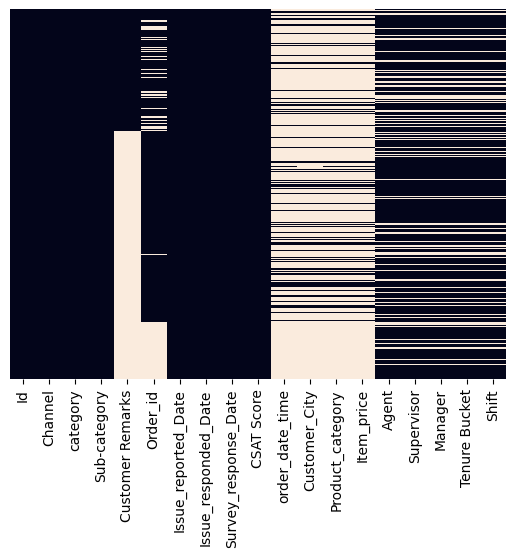

In [ ]:
data_with_agents = data_with_agents.drop(columns=['Agent_name', 'Agent_name_count', 'Agent_name_agent'], errors='ignore')
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)

##Доп задания

#Инжиниринг численных принаков

In [ ]:
import pandas as pd
url = "https://github.com/koroteevmv/ML_course/raw/main/ML5.2%20numeric%20features/data/PRSA_Data.csv"
prsa_data = pd.read_csv(url)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [ ]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   SO2         35064 non-null  float64
 3   NO2         35064 non-null  float64
 4   CO          35064 non-null  float64
 5   O3          35064 non-null  float64
 6   PRES        35064 non-null  float64
 7   RAIN        35064 non-null  float64
 8   wd          35064 non-null  object 
 9   WSPM        35064 non-null  float64
 10  AQI Label   35064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.9+ MB


In [ ]:
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17531.500000,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8765.750000,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17531.500000,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26297.250000,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


In [ ]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [ ]:
num_cols = prsa_data.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    neg_count = (prsa_data[col] < 0).sum()
    print(f"Отрицательных значений в столбце '{col}': {neg_count}")

Отрицательных значений в столбце 'Unnamed: 0': 0
Отрицательных значений в столбце 'No': 0
Отрицательных значений в столбце 'SO2': 0
Отрицательных значений в столбце 'NO2': 0
Отрицательных значений в столбце 'CO': 0
Отрицательных значений в столбце 'O3': 19
Отрицательных значений в столбце 'PRES': 0
Отрицательных значений в столбце 'RAIN': 0
Отрицательных значений в столбце 'WSPM': 0


<Axes: xlabel='SO2', ylabel='Count'>

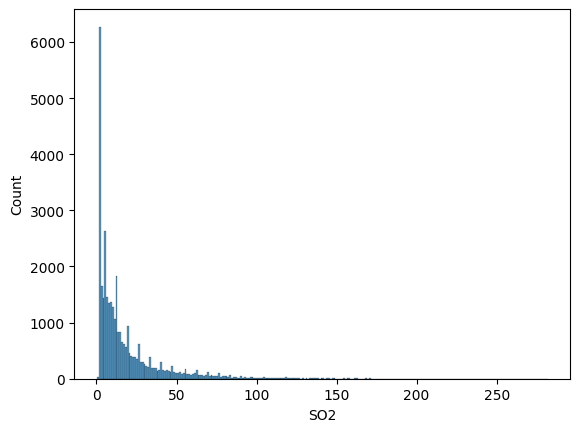

In [ ]:
sns.histplot(prsa_data.SO2)

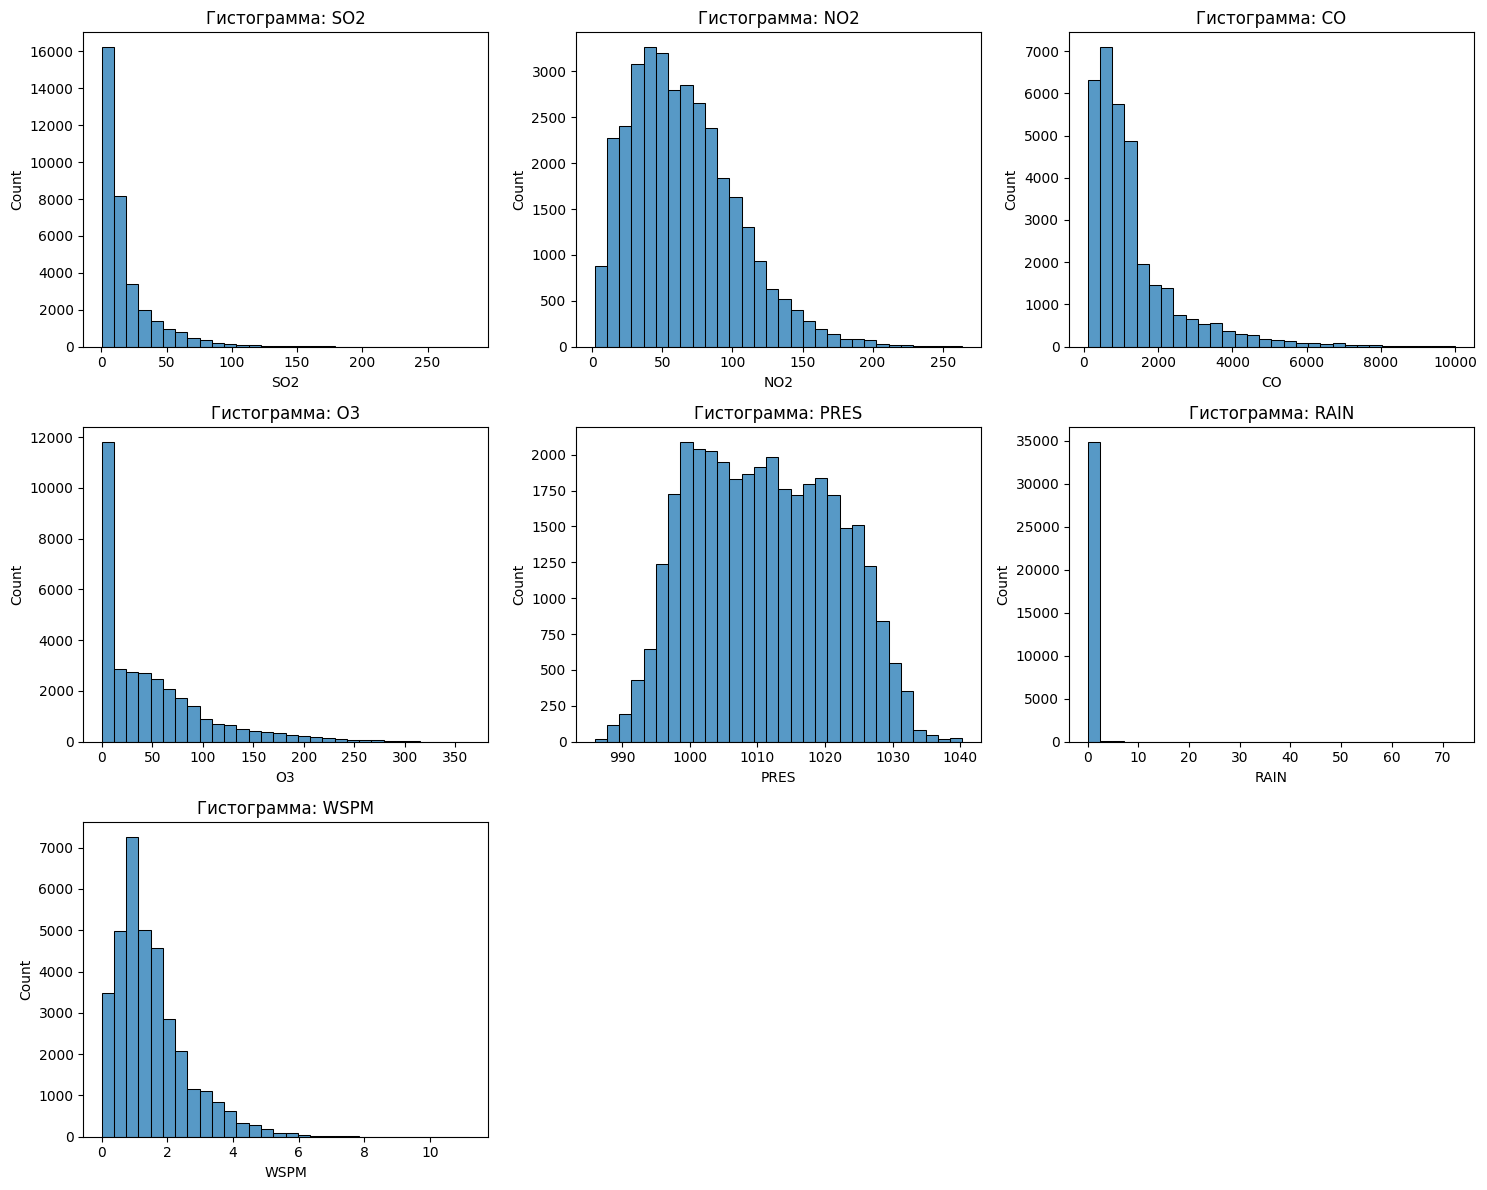

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['SO2', 'NO2', 'CO', 'O3', 'PRES', 'RAIN', 'WSPM']
cols_per_row = 3
rows = (len(num_cols) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(5 * cols_per_row, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(prsa_data[col], bins=30, kde=False)
    plt.title(f'Гистограмма: {col}')

plt.tight_layout()
plt.show()

In [ ]:
prsa_data.RAIN[prsa_data.RAIN > 0]

,RAIN
267,0.1
268,0.4
269,0.1
270,0.9
271,0.9
...,...
34891,0.2
34892,0.7
34893,0.9
34894,0.4


In [ ]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17531.500000,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,0.000000,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8765.750000,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17531.500000,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26297.250000,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


<ipython-input-30-504ecaf17445>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x=col, hue="AQI Label")
<ipython-input-30-504ecaf17445>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x=col, hue="AQI Label")


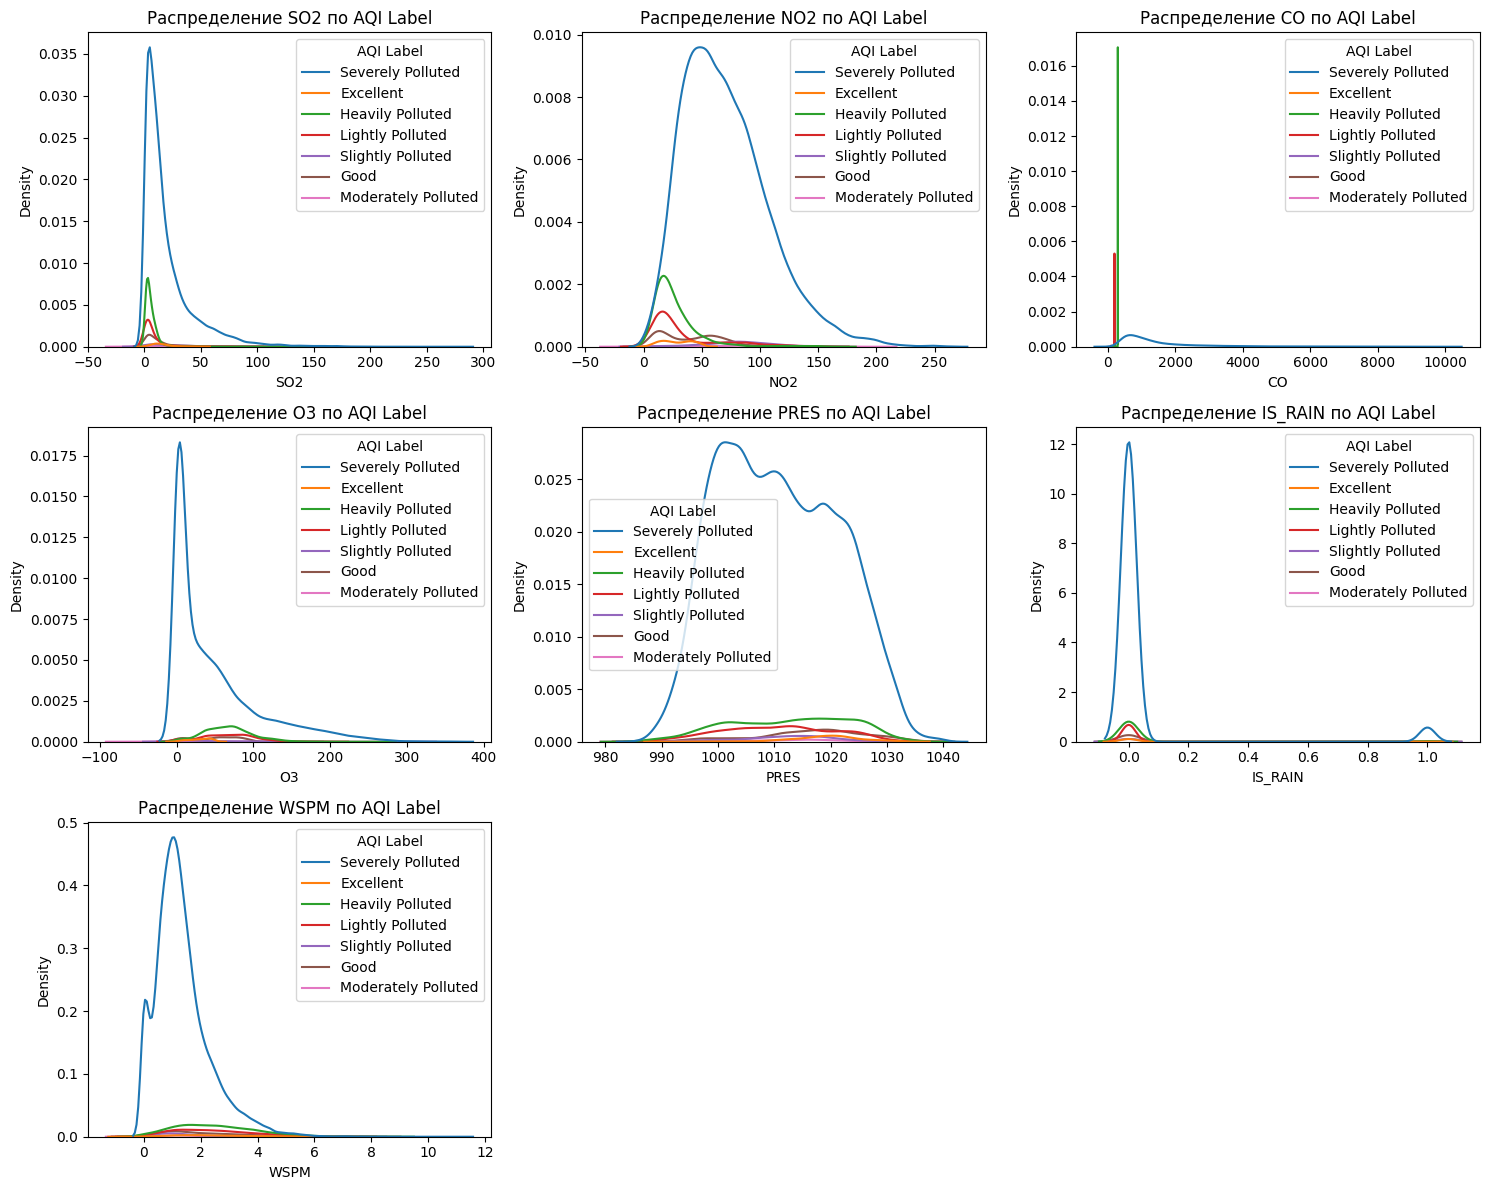

In [ ]:
num_cols = ['SO2', 'NO2', 'CO', 'O3', 'PRES', 'IS_RAIN', 'WSPM']
cols_per_row = 3
rows = (len(num_cols) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(5 * cols_per_row, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.kdeplot(data=prsa_data, x=col, hue="AQI Label")
    plt.title(f'Распределение {col} по AQI Label')

plt.tight_layout()
plt.show()

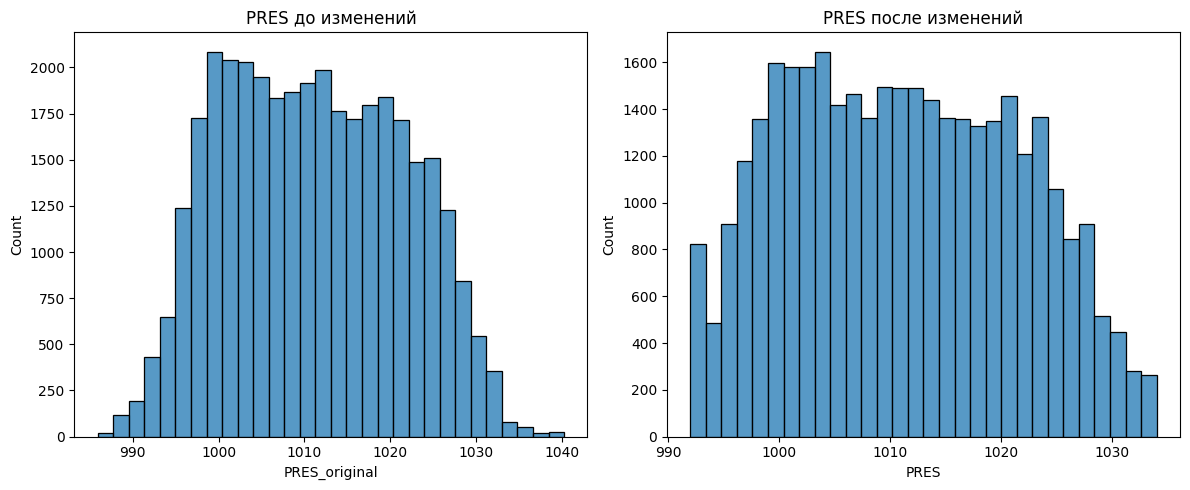

In [ ]:
prsa_data['PRES_original'] = prsa_data['PRES'].copy()
prsa_data.loc[prsa_data.PRES <= 992, 'PRES'] = 992
prsa_data.loc[prsa_data.PRES >= 1034, 'PRES'] = 1034

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(prsa_data['PRES_original'], bins=30, kde=False)
plt.title('PRES до изменений')
plt.subplot(1, 2, 2)
sns.histplot(prsa_data['PRES'], bins=30, kde=False)
plt.title('PRES после изменений')

plt.tight_layout()
plt.show()

<Axes: >

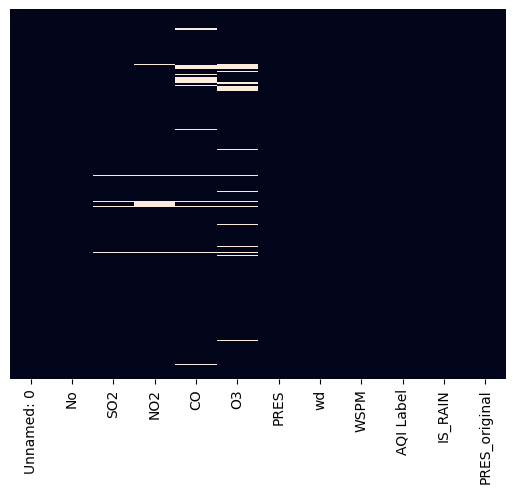

In [ ]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

,0
3,2
276,3
435,2
459,2
555,2
...,...
34880,4
34883,4
34885,4
35029,2


<Axes: >

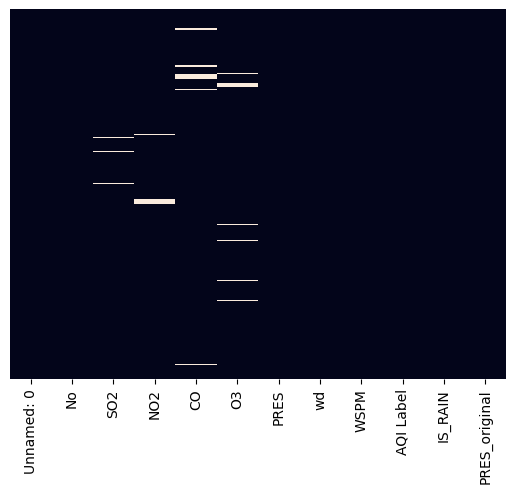

In [ ]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
prsa_data.isnull().sum()

,0
Unnamed: 0,0
No,0
SO2,281
NO2,702
CO,1028
O3,1300
PRES,0
wd,0
WSPM,0
AQI Label,0


<Axes: >

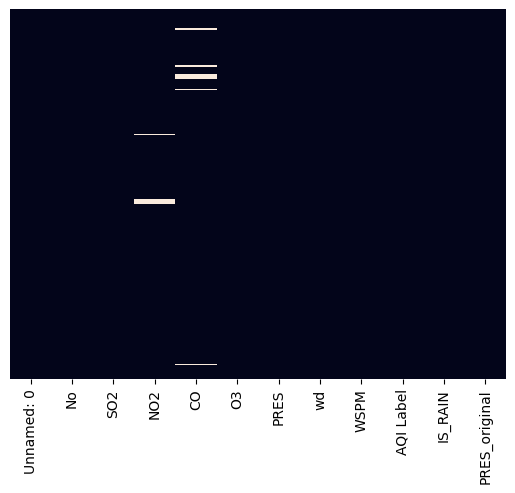

In [ ]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())
filler = prsa_data.O3[prsa_data.O3.isna()]
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)
prsa_data.O3 = prsa_data.O3.fillna(filler)
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,PRES_original
0,0,1,6.000000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,1023.0
1,1,2,6.000000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,1023.2
2,2,3,1011.055986,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,1023.5
4,4,5,9.000000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,1025.2
5,5,6,8.000000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,1025.6


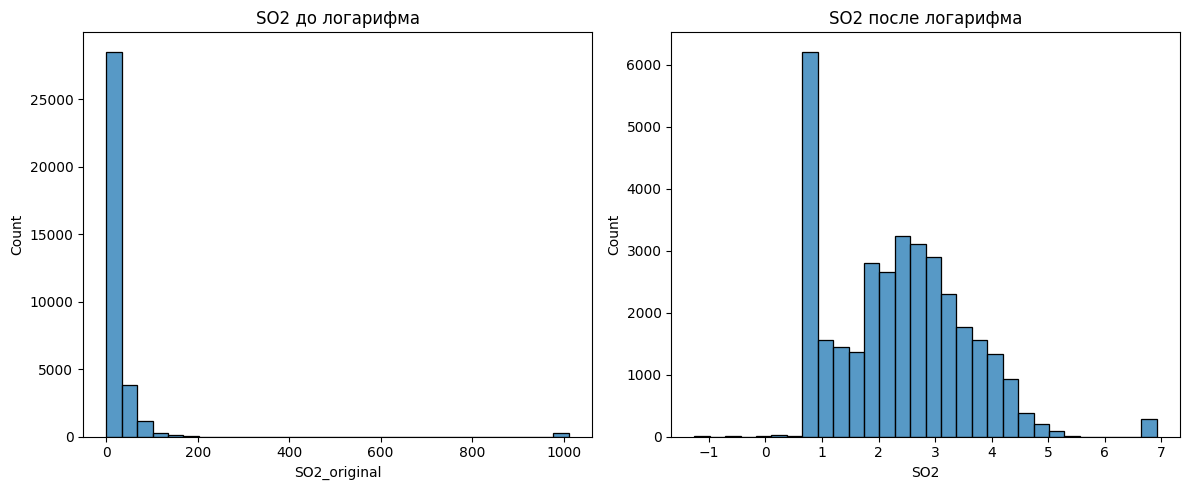

In [ ]:
prsa_data['SO2_original'] = prsa_data['SO2'].copy()
prsa_data['SO2'] = np.log(prsa_data['SO2'] + 1e-6)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(prsa_data['SO2_original'], bins=30, kde=False)
plt.title('SO2 до логарифма')
plt.subplot(1, 2, 2)
sns.histplot(prsa_data['SO2'], bins=30, kde=False)
plt.title('SO2 после логарифма')
plt.tight_layout()
plt.show()

## Доп задания

#Инжиниринг категориальных признаков

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/Customer_support_data.csv"
CS_data = pd.read_csv(url)
CS_data.head(1)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5


In [ ]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
CS_data.describe(include="all")

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/titanic.csv"
T_data = pd.read_csv(url)
T_data.head(1)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
T_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    object 
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [ ]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Dooley, Mr. Patrick",male,347082,G6,S
freq,491,1,577,7,4,644


<Axes: xlabel='channel_name', ylabel='Count'>

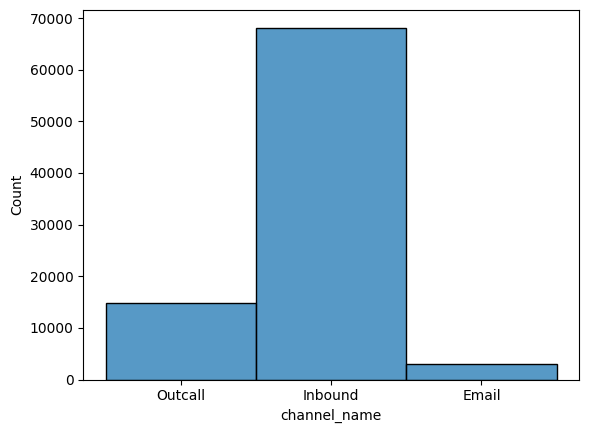

In [ ]:
sns.histplot(data=CS_data, x="channel_name")

In [ ]:
CS_data.channel_name.value_counts()

,count
channel_name,
Inbound,68142
Outcall,14742
Email,3023


In [ ]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

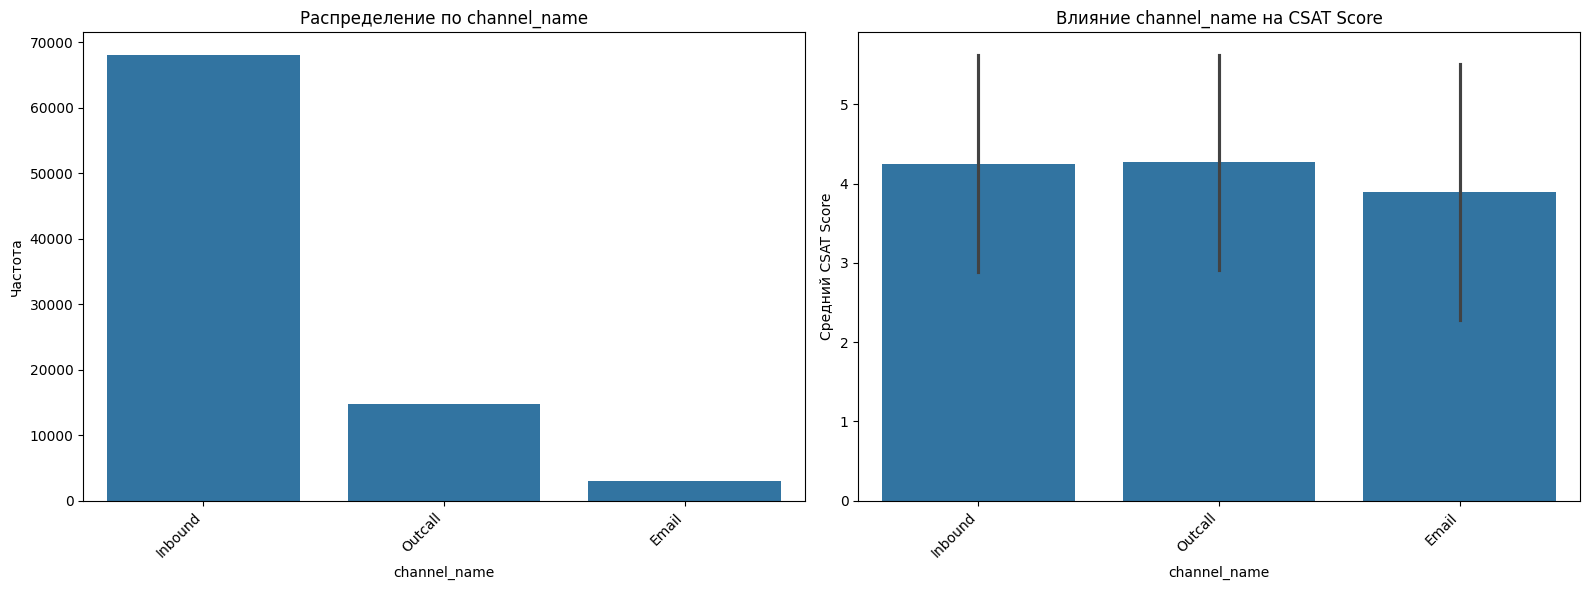

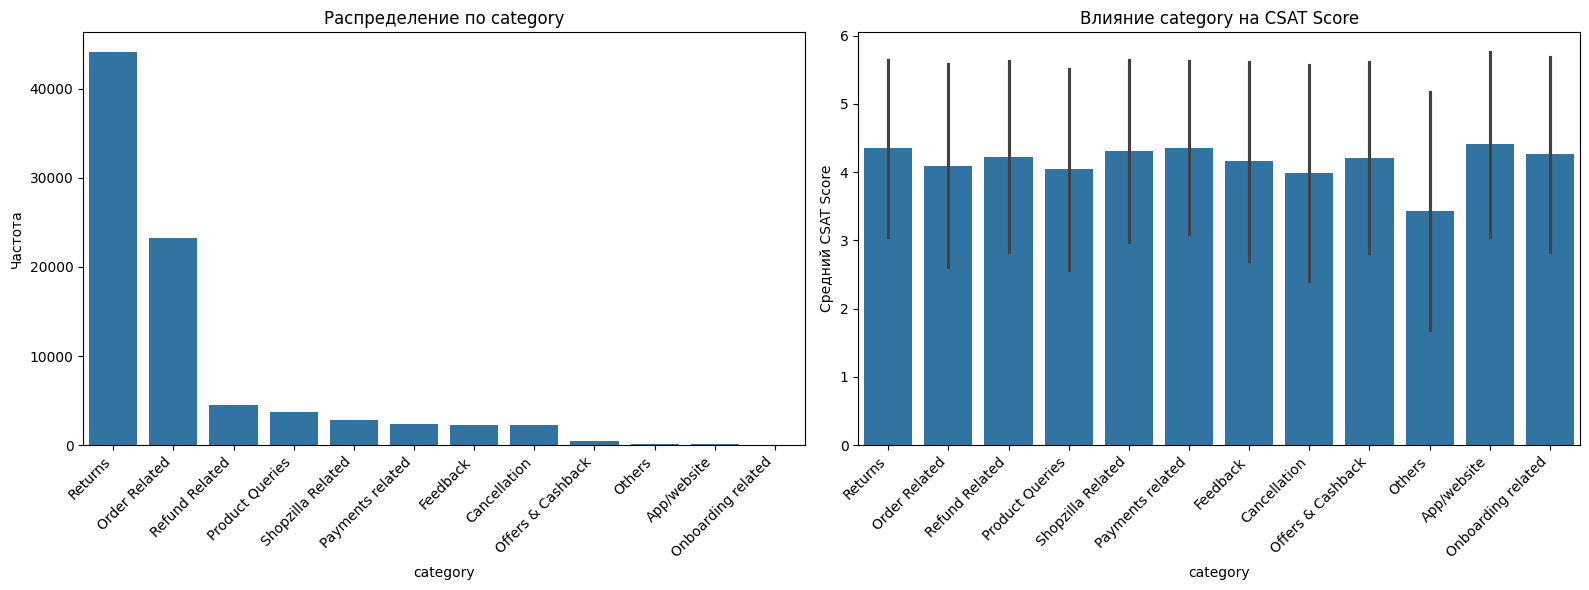

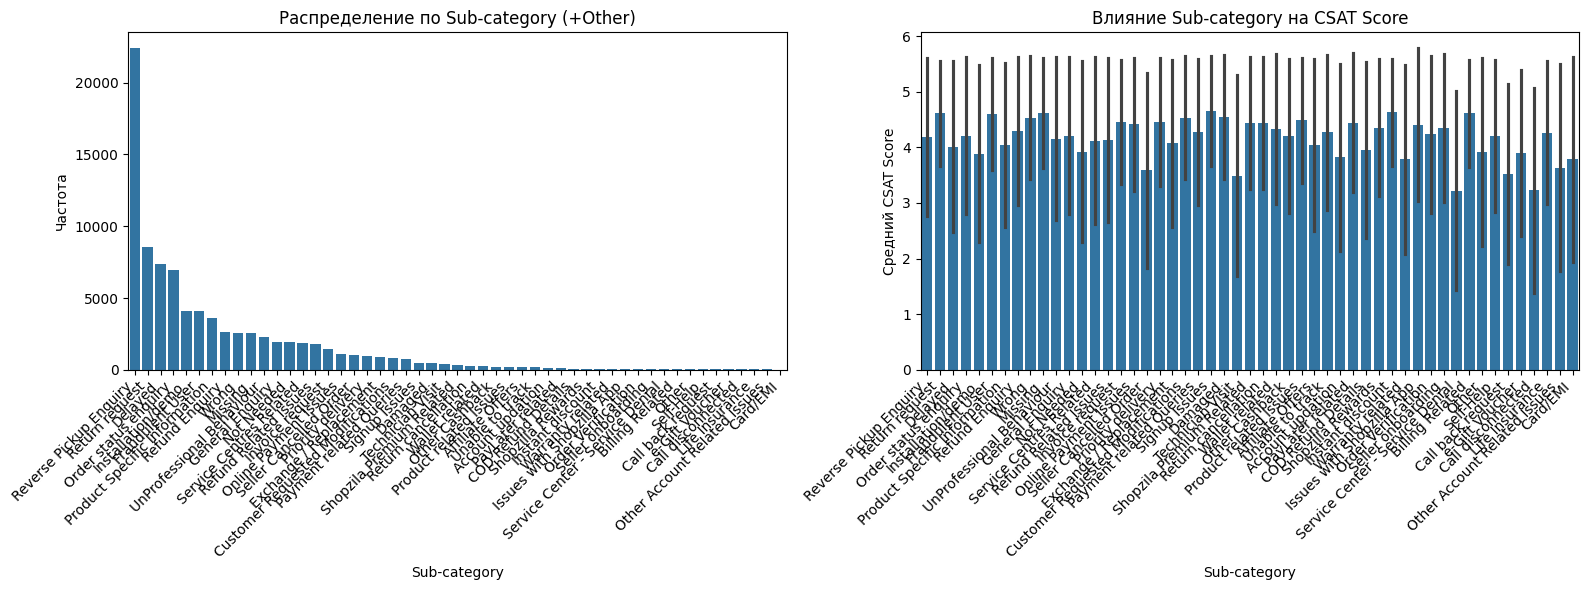

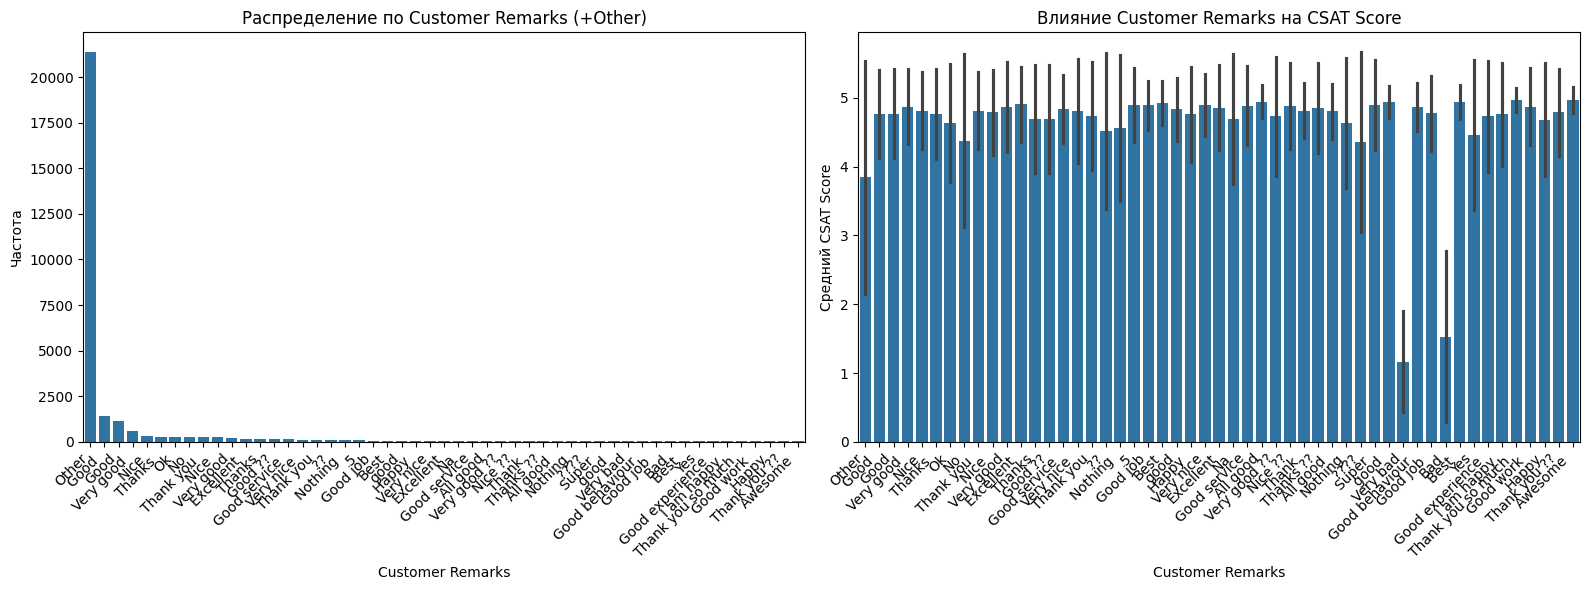

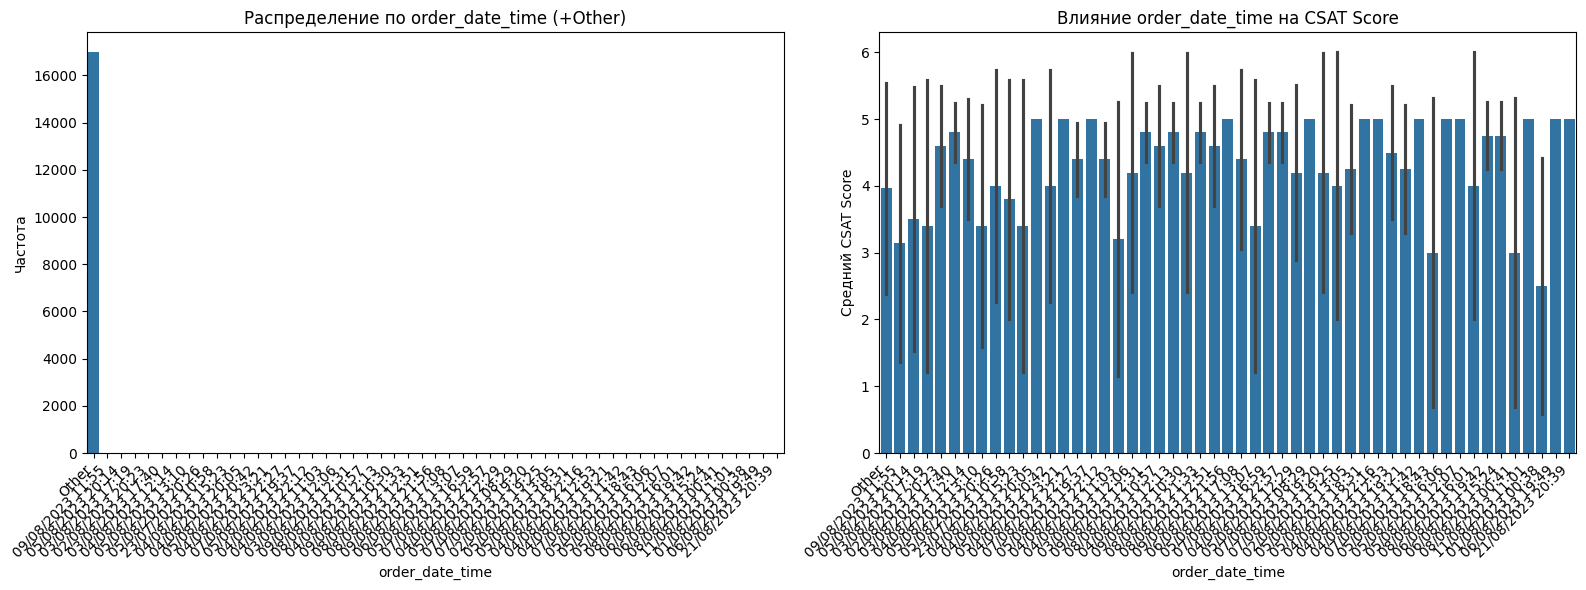

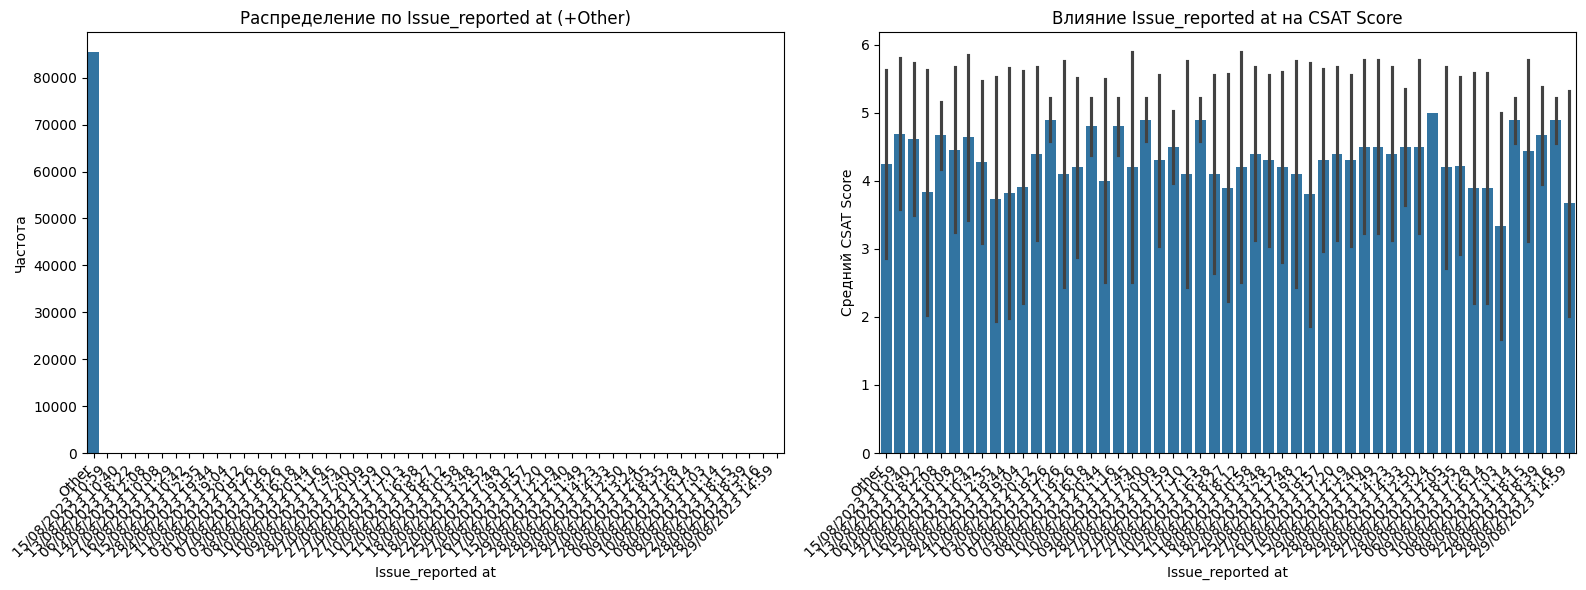

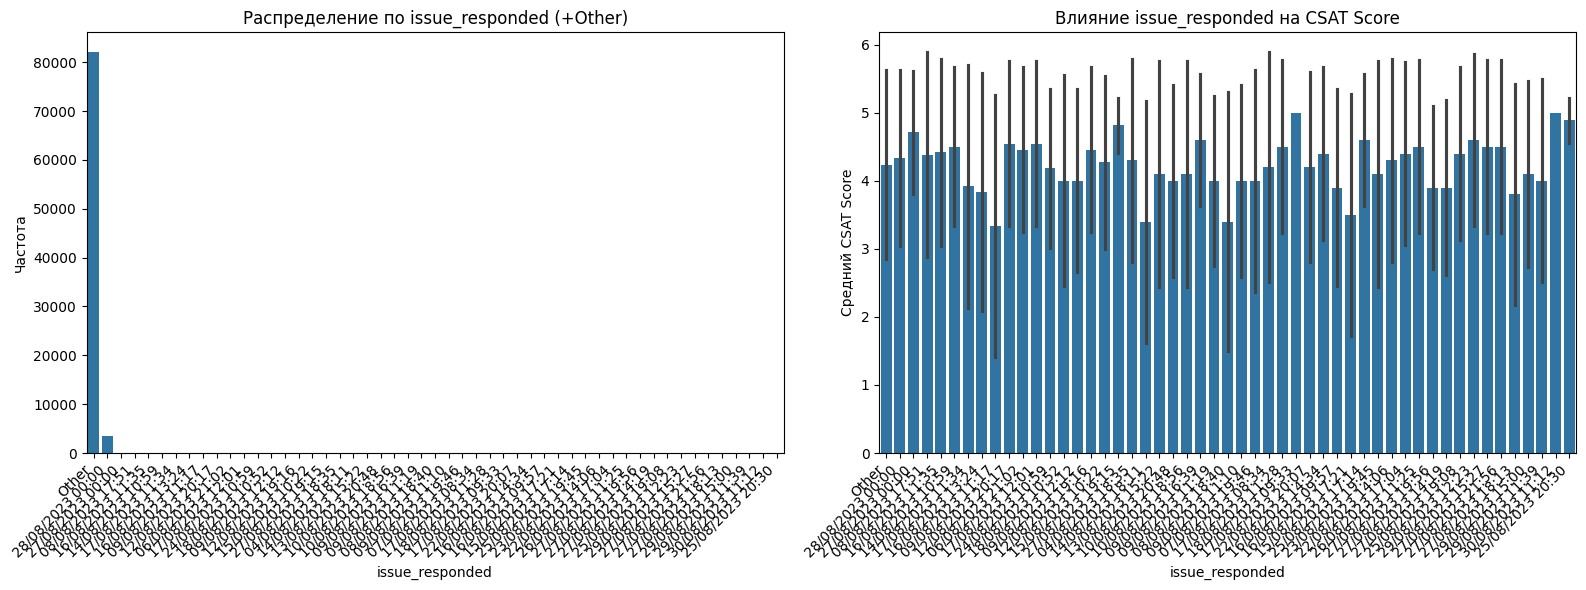

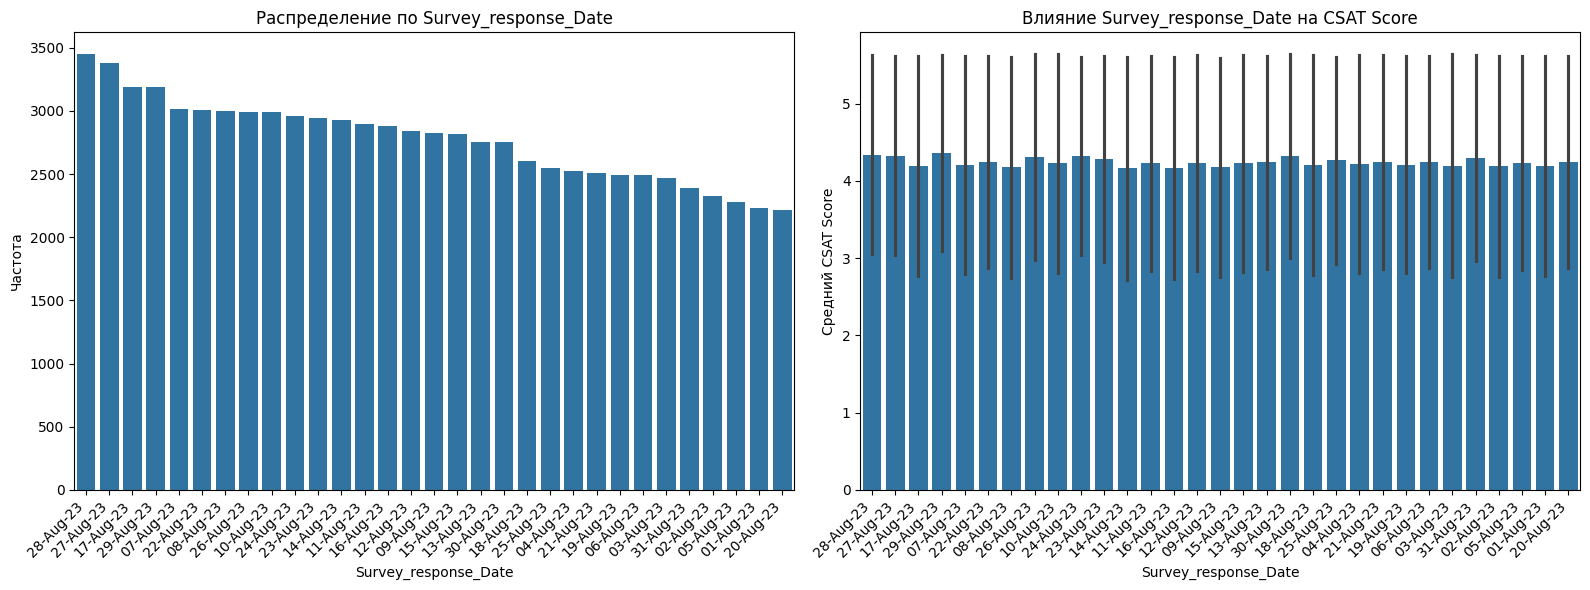

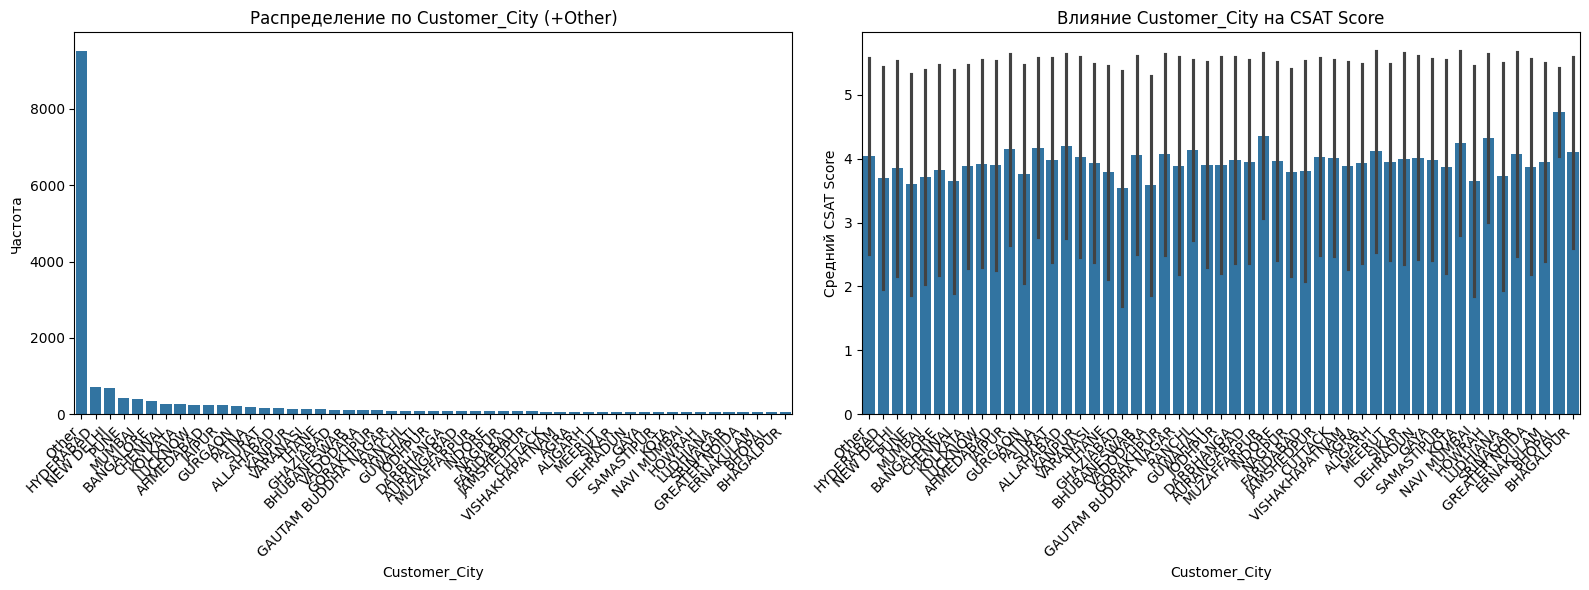

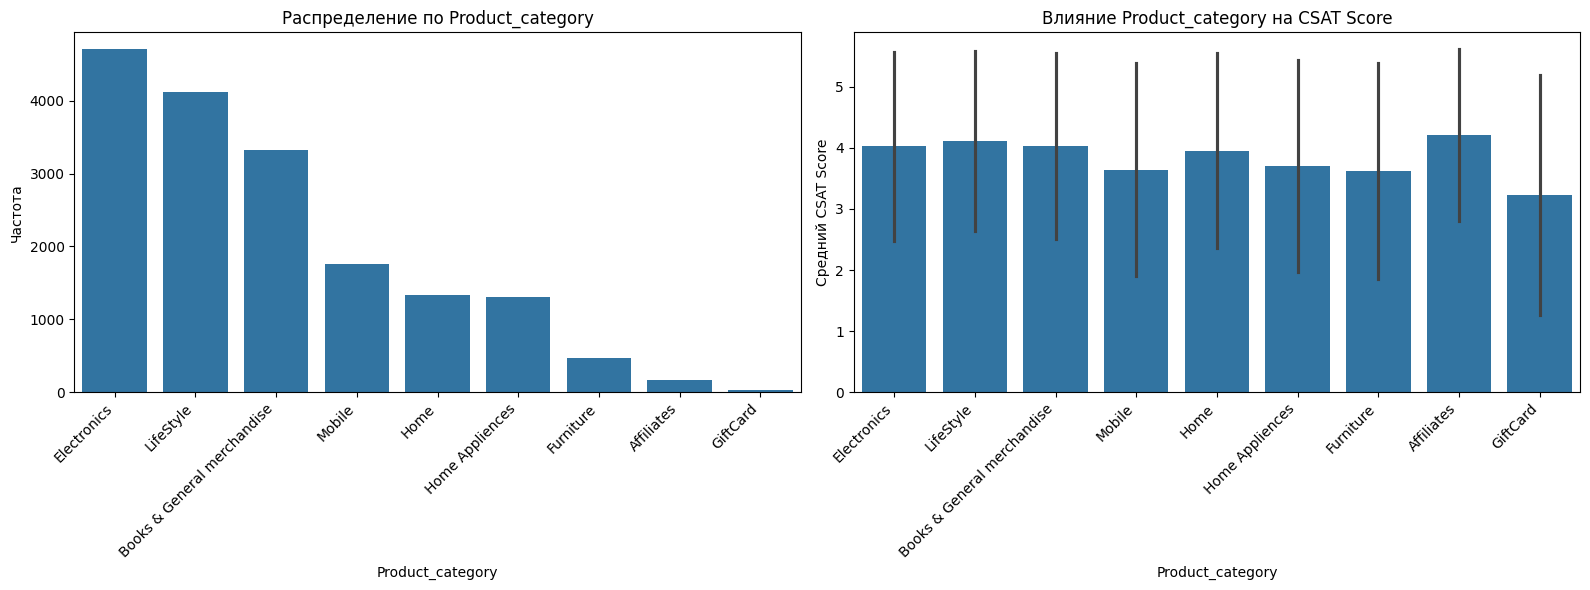

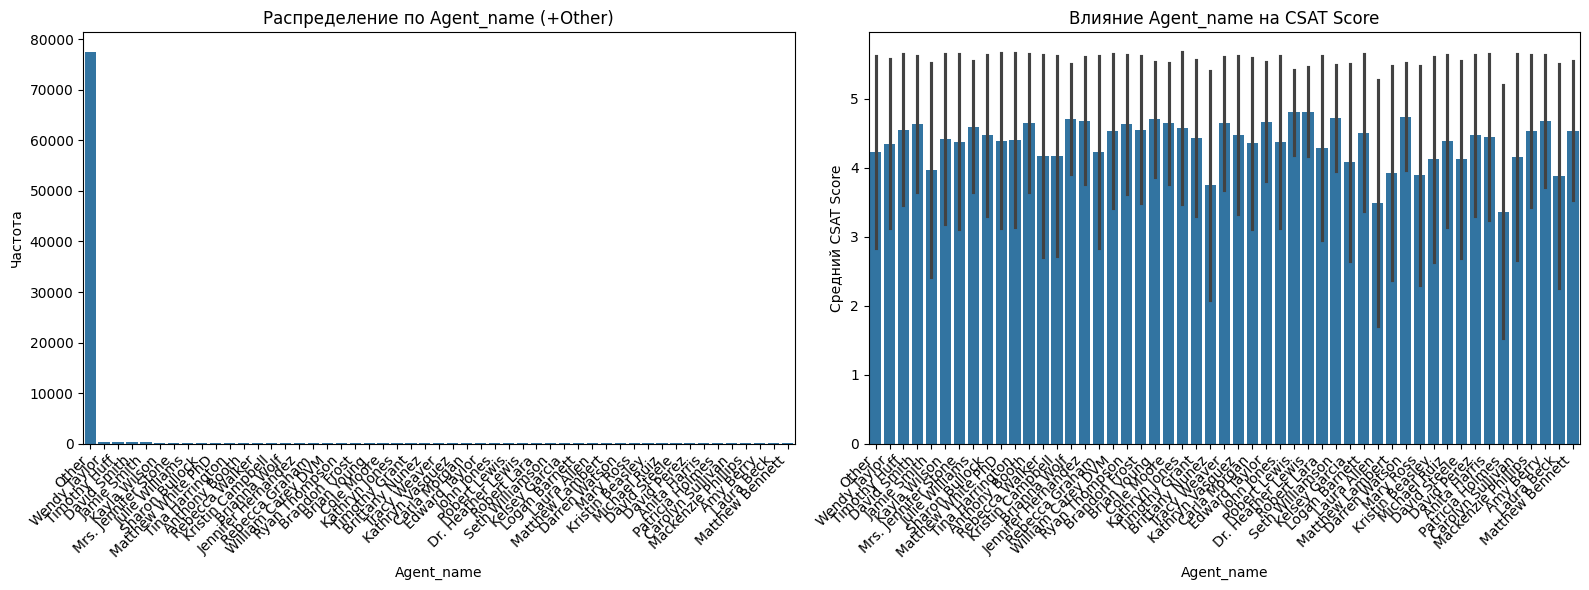

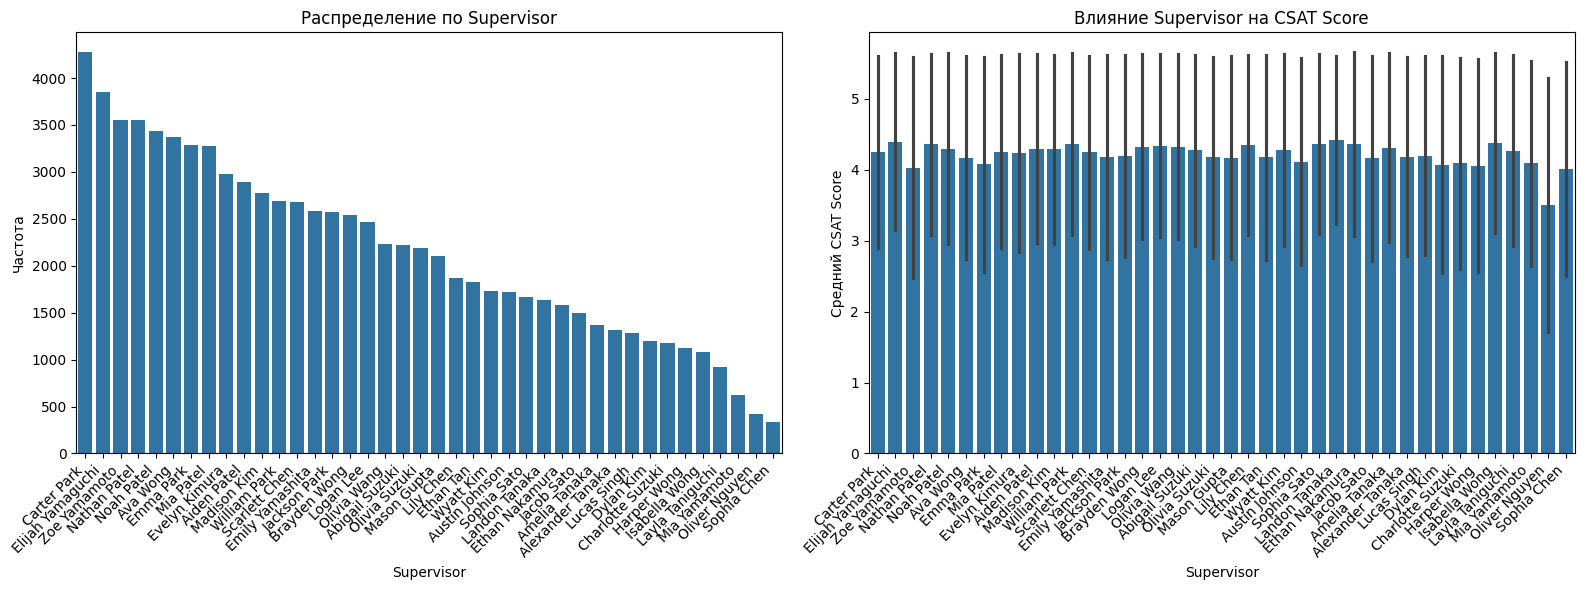

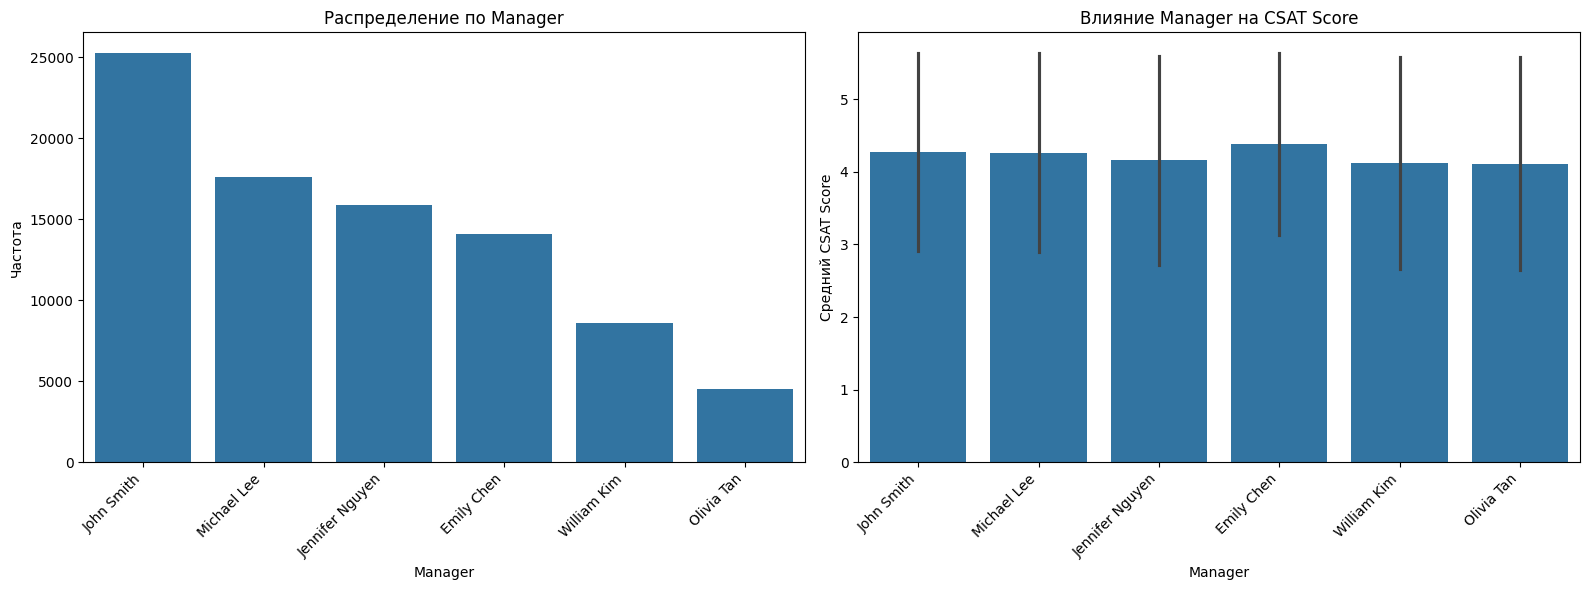

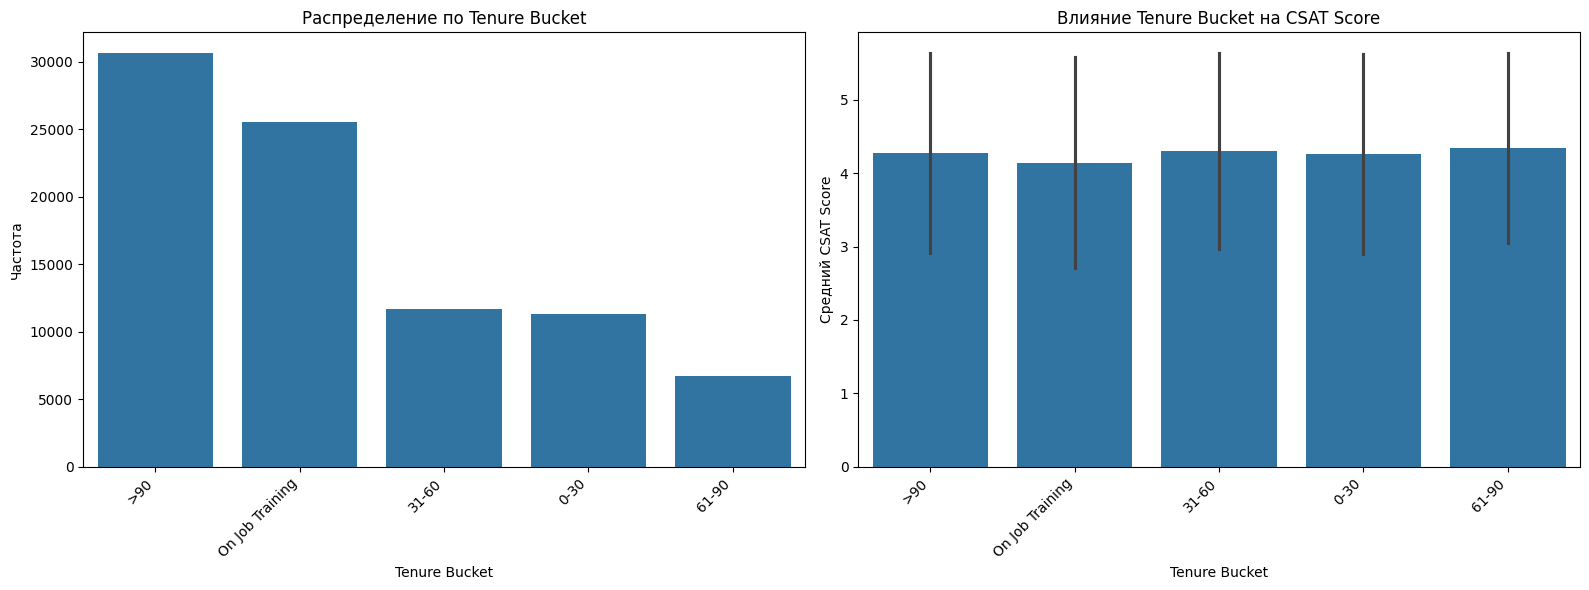

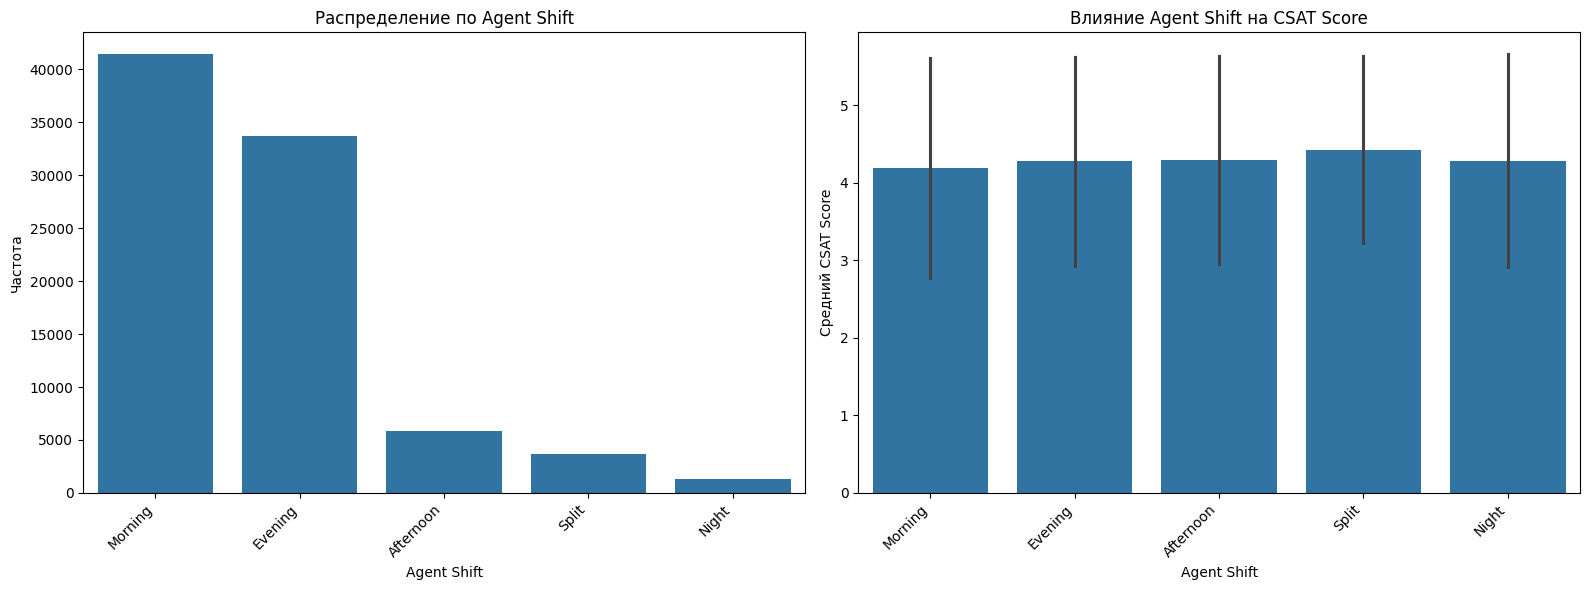

In [ ]:
features = [col for col in CS_data.columns
            if col not in ['Unique id', 'CSAT Score', 'Order_id'] and CS_data[col].dtype == 'object']
for feature in features:
    plt.figure(figsize=(16,6))
    data = CS_data[[feature, 'CSAT Score']].copy()
    data = data.dropna(subset=[feature, 'CSAT Score'])
    plt.subplot(1, 2, 1)
    if data[feature].dtype == 'object':
        unique_vals = data[feature].nunique()
        if unique_vals > 50:
            counts = data[feature].value_counts().head(50)
            top_vals = counts.index
            data[feature] = data[feature].where(data[feature].isin(top_vals), other='Other')
            counts = data[feature].value_counts()
            sns.barplot(x=counts.index, y=counts.values,)
            plt.title(f'Распределение по {feature} (+Other)')
        else:
            counts = data[feature].value_counts()
            sns.barplot(x=counts.index, y=counts.values)
            plt.title(f'Распределение по {feature}')
        plt.xlabel(feature)
        plt.ylabel('Частота')
        plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    if data[feature].dtype == 'object':
        order_vals = data[feature].value_counts().index
        sns.barplot(x=feature, y='CSAT Score', data=data, errorbar='sd', order=order_vals)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Влияние {feature} на CSAT Score')
        plt.xlabel(feature)
        plt.ylabel('Средний CSAT Score')
    plt.tight_layout()
    plt.show()

In [ ]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry",
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

In [ ]:
CS_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


In [ ]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')

In [ ]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


In [ ]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')

In [ ]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

<ipython-input-55-a2a6ce2551d3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  T_data.Pclass.replace({
<ipython-input-55-a2a6ce2551d3>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T_data.Pclass.replace({


In [ ]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
OH_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

In [ ]:
dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']),
                       index = T_data.index)
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)
T_dummies.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,NaN,NaN,NaN,NaN
2,2.0,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,NaN,NaN,NaN,NaN


In [ ]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)
CS_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   channel_name             85907 non-null  object
 1   category                 85907 non-null  object
 2   Product_category         85907 non-null  object
 3   connected_handling_time  85907 non-null  object
 4   Manager                  85907 non-null  object
 5   Tenure Bucket            85907 non-null  object
 6   Agent Shift              85907 non-null  object
 7   CSAT Score               85907 non-null  int64 
 8   Customer Remarks New     85907 non-null  int64 
 9   Is_order                 85907 non-null  int64 
 10  Agent_count              85907 non-null  int64 
 11  Sups_no_agents           85907 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 7.9+ MB


In [ ]:
CS_dummies = pd.get_dummies(CS_dropped)

##Доп задания

#Таргет и отбор признаков

In [ ]:
from sklearn.datasets import fetch_openml
df = fetch_openml("mtp", version=1)
df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


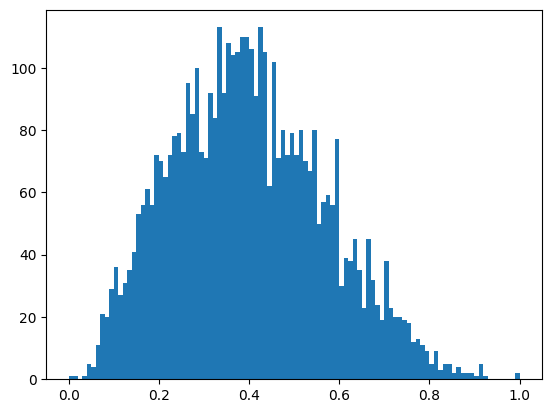

In [ ]:
plt.hist(df.target, 100)
_ = plt.plot()

In [ ]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4450 entries, 0 to 4449
Columns: 202 entries, oz1 to oz202
dtypes: float64(201), int64(1)
memory usage: 6.9 MB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
baseline = LinearRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340762242646

Text(0.5, 0, 'Feature Importance')

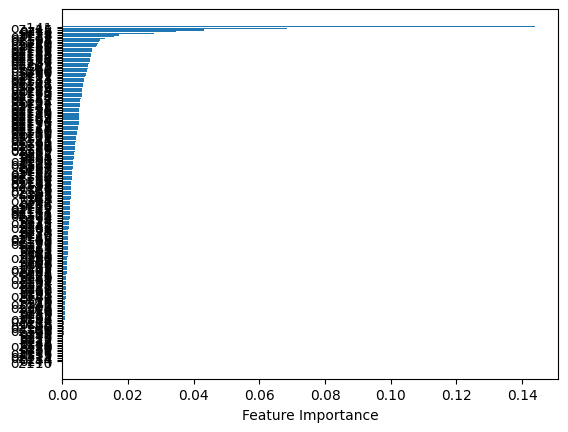

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [ ]:
df.data.columns[sort][-10:]

Index(['oz20', 'oz197', 'oz198', 'oz112', 'oz137', 'oz18', 'oz35', 'oz48',
       'oz15', 'oz141'],
      dtype='object')

In [ ]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz170,oz183,oz160,oz153,oz158,oz159,oz161,oz155,oz56,oz180,oz20,oz197,oz198,oz112,oz137,oz18,oz35,oz48,oz15,oz141
0,0.866163,0.037098,0.865588,0.052296,0.800120,0.929724,0.382067,0.752291,0.126277,0.002655,0.000000,0.505899,0.039213,0.000000,0.000000,0.0625,0.0,0.312855,0.000000,0.041308
1,0.866069,0.087622,0.866714,0.060922,0.791224,0.944542,0.383458,0.745984,0.422015,0.002581,0.242424,0.683820,0.326584,0.222222,0.278945,0.0625,0.4,0.297041,0.282828,0.212274
2,0.866224,0.056448,0.865890,0.072628,0.798276,0.946121,0.382596,0.753298,0.000000,0.002722,0.388889,0.499219,0.204885,0.000000,0.000000,0.1250,0.0,0.288557,0.388889,0.063643
3,0.865988,0.062874,0.865875,0.054593,0.800965,0.945087,0.382776,0.767469,0.000000,0.002473,0.095238,0.630533,0.023469,0.000000,0.039437,0.0000,0.1,0.310692,0.111111,0.031193
4,0.866283,0.035746,0.865112,0.045400,0.802893,0.941644,0.383539,0.741548,0.000000,0.002810,0.260870,0.516053,0.111398,0.000000,0.000000,0.0625,0.0,0.286581,0.304348,0.063643


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.3602493157998794

In [ ]:
df = fetch_openml("balance-scale", version=1)
df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


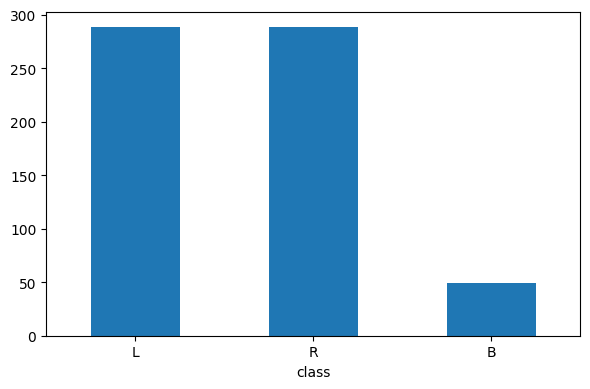

In [ ]:
target_counts = df.target.value_counts()
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

In [ ]:
from sklearn.linear_model import LogisticRegression
baseline = LogisticRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



In [ ]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': np.float64(4.216216216216216),
 'L': np.float64(0.7255813953488373),
 'R': np.float64(0.7222222222222222)}

In [ ]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [ ]:
print(classification_report(y_test, weighted.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



In [ ]:
y_train.value_counts()

,count
class,
R,216
L,215
B,37


In [ ]:
X_train["target"] = y_train

In [ ]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [ ]:
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


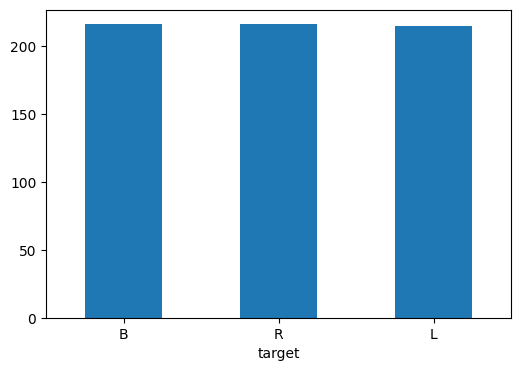

In [ ]:
target_counts = oversampled.target.value_counts()

plt.figure(figsize=(6,4))
target_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [ ]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [ ]:
print(classification_report(y_test, OSmodel.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



In [ ]:
df = fetch_openml("CPMP-2015-regression", version=1)
df.data.drop(["instance_id"], inplace=True, axis=1)
df.data = pd.get_dummies(df.data)
df.data.head()

<ipython-input-86-fe69465c1096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(["instance_id"], inplace=True, axis=1)


,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,group.same.max,...,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_astar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_idastar.symmulgt.transmul,algorithm_idastar.symmullt.transmul,runstatus_memout,runstatus_ok,runstatus_timeout
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,True,False,False,False,False,True,False
1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,True,False,False,False,True,False
2,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,True,False,False,True,False
3,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,False,True,False,False,True
4,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,7,...,0.663462,0.3375,0.0,True,False,False,False,True,False,False


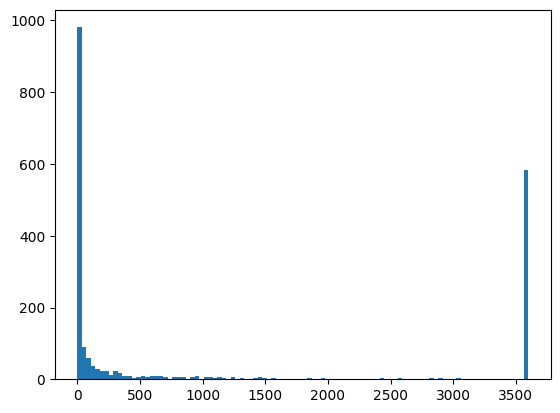

In [ ]:
plt.hist(df.target, 100)
_ = plt.plot()

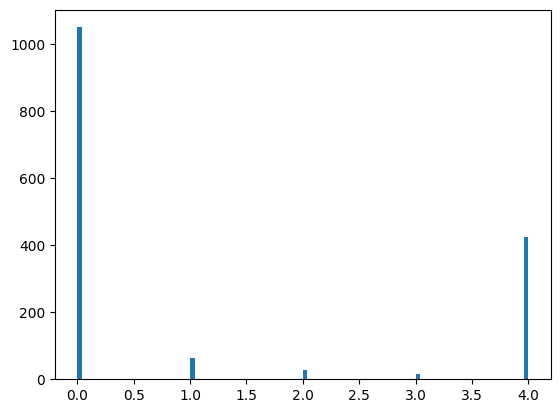

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)
from sklearn.preprocessing import KBinsDiscretizer
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform").fit_transform(pd.DataFrame(y_train))
plt.hist(y_binned, bins=100)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


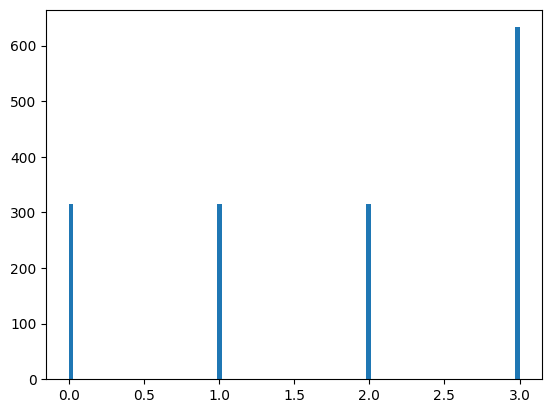

In [ ]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile").fit_transform(pd.DataFrame(y_train))
plt.hist(y_binned, bins=100)
plt.show()